# Projet IA HumanForYou


|Auteur|
|---|
|Victor Massotte|
|Quentin Butel|
|Lyna Selam|
|Arthur Oliveira|
|Guillaume Langlois|

## Contexte

La direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

##  1. Préparation des données

### A. Initialisation du projet

In [5]:
# imports
import numpy as np
import seaborn as sns
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### B. Importation

In [6]:
import os
import pandas as pd

dataSets_Path = os.path.join(".\datasets")

generalData = pd.read_csv(os.path.join(dataSets_Path, "general_data.csv"))
employeeData = pd.read_csv(os.path.join(dataSets_Path, "employee_survey_data.csv"))
managerData = pd.read_csv(os.path.join(dataSets_Path, "manager_survey_data.csv"))
csvInTimeData = pd.read_csv(os.path.join(dataSets_Path, "in_time.csv"))
csvOutTimeData = pd.read_csv(os.path.join(dataSets_Path, "out_time.csv"))

intTimeData = csvInTimeData.rename(columns={'Unnamed: 0': 'EmployeeID'})
outTimeData = csvOutTimeData.rename(columns={'Unnamed: 0': 'EmployeeID'})

In [7]:
allData = pd.merge(employeeData, generalData, how='inner', on=['EmployeeID'])
allData = allData.merge(managerData, how='inner', on=['EmployeeID'])

""" allData = allData.merge(intTimeData, how='inner', on=['EmployeeID'])
allData = allData.merge(outTimeData, how='inner', on=['EmployeeID']) """

allData.drop("EmployeeID", axis=1, inplace=True) #useless
allData.drop("Over18", axis=1, inplace=True) #useless
allData.drop("EmployeeCount", axis=1, inplace=True) #useless
allData.drop("StandardHours", axis=1, inplace=True) #useless

allData.drop("MaritalStatus", axis=1, inplace=True) #ethic
allData.drop("Gender", axis=1, inplace=True) #ethic
allData.drop("StockOptionLevel", axis=1, inplace=True) #ethic

Test = allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

### C. Decode valeur

In [8]:
allData['PerformanceRating'] = allData['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
allData['EnvironmentSatisfaction'] = allData['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['JobSatisfaction'] = allData['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['JobInvolvement'] = allData['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['WorkLifeBalance'] = allData['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})
allData['Education'] = allData['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
allData['JobLevel'] = allData["JobLevel"].replace({ 1 : 'Apprentice', 2: 'Junior Employee',3: 'Employee',4: 'Manager',5 : 'Director'})

In [9]:
allData.describe(include="all")

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4385,4390,4372,4410.000000,4410,4410,4410,4410.000000,4410,4410,...,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410,4410
unique,4,4,4,NaN,2,3,3,NaN,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
top,High,Very High,Better,NaN,No,Travel_Rarely,Research & Development,NaN,Bachelor,Life Sciences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,Excellent
freq,1350,1367,2660,NaN,3699,3129,2883,NaN,1716,1818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2604,3732
mean,NaN,NaN,NaN,36.923810,NaN,NaN,NaN,9.192517,NaN,NaN,...,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129,NaN,NaN
std,NaN,NaN,NaN,9.133301,NaN,NaN,NaN,8.105026,NaN,NaN,...,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,2.000000,NaN,NaN,...,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,7.000000,NaN,NaN,...,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,14.000000,NaN,NaN,...,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,NaN


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

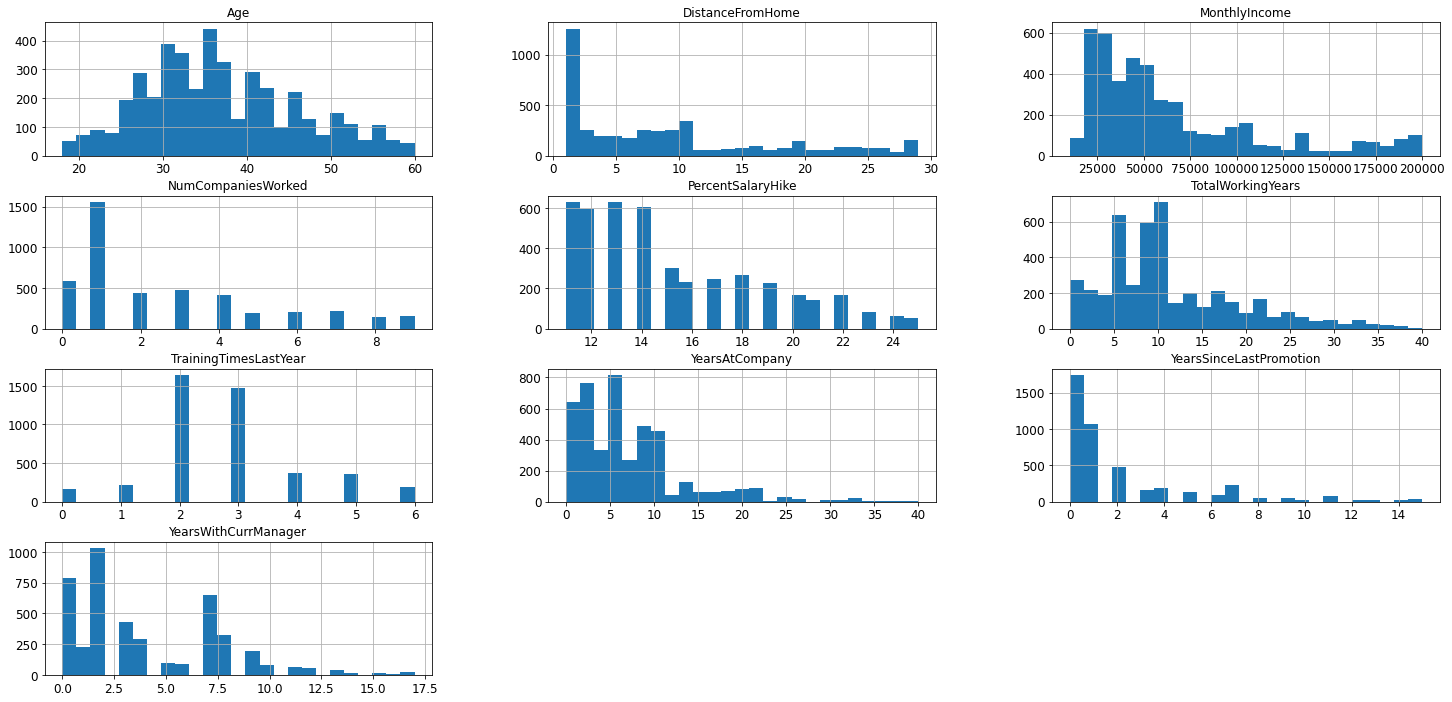

In [10]:
allData.hist(figsize=(25,12), bins=25,column=list(allData.columns))

##  2. Pré-traitement des données


### A. Analyse des variables



#### Analyse de toutes les variables qualitatives

Vous trouverez en dessous tous les graphes avec les variables de type `object` du jeu de données.

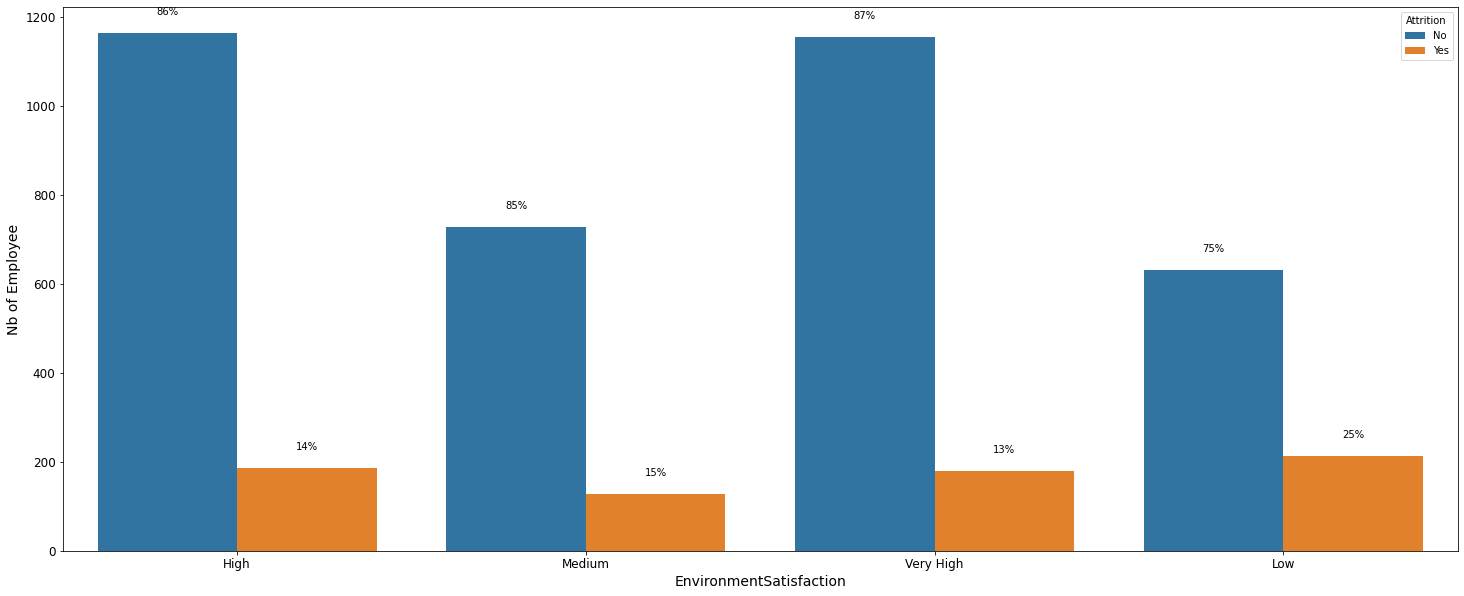

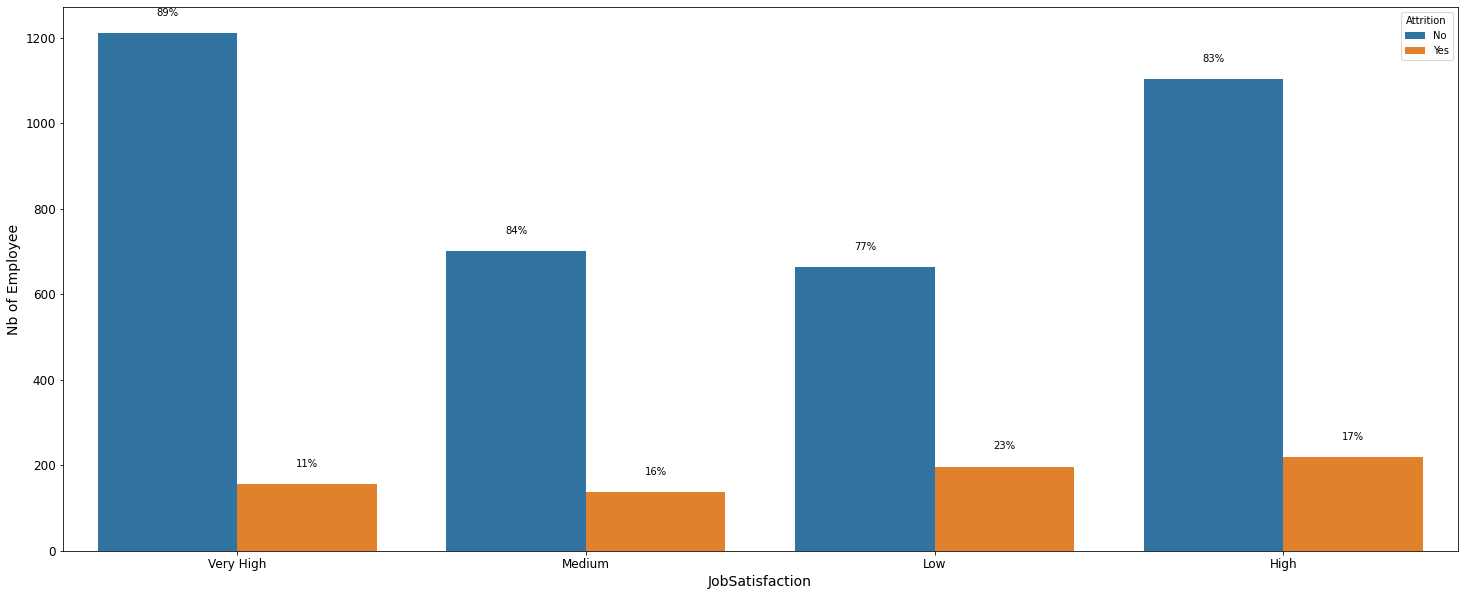

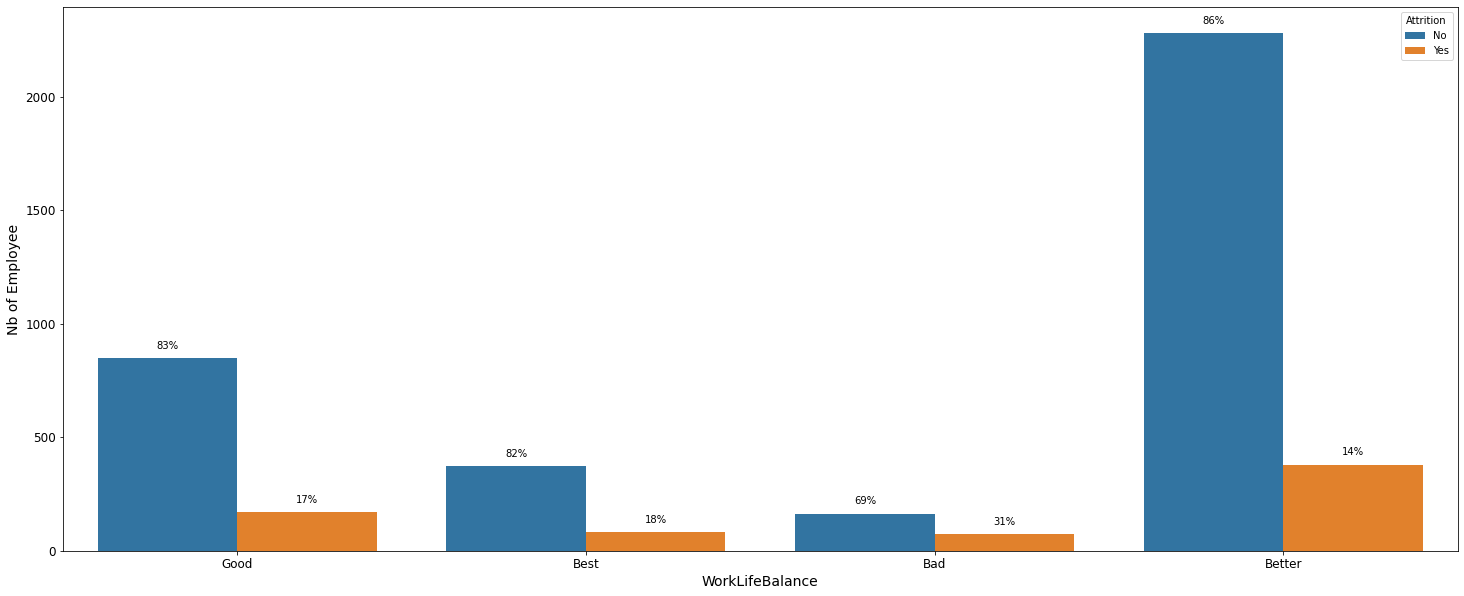

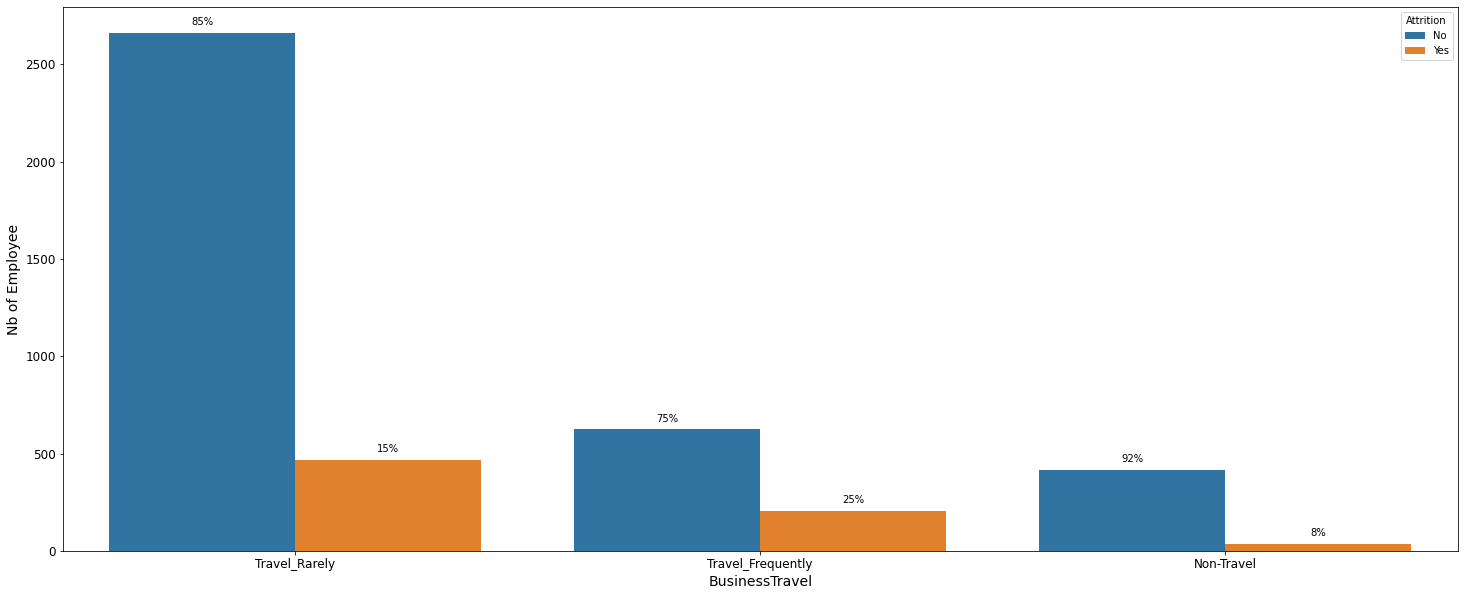

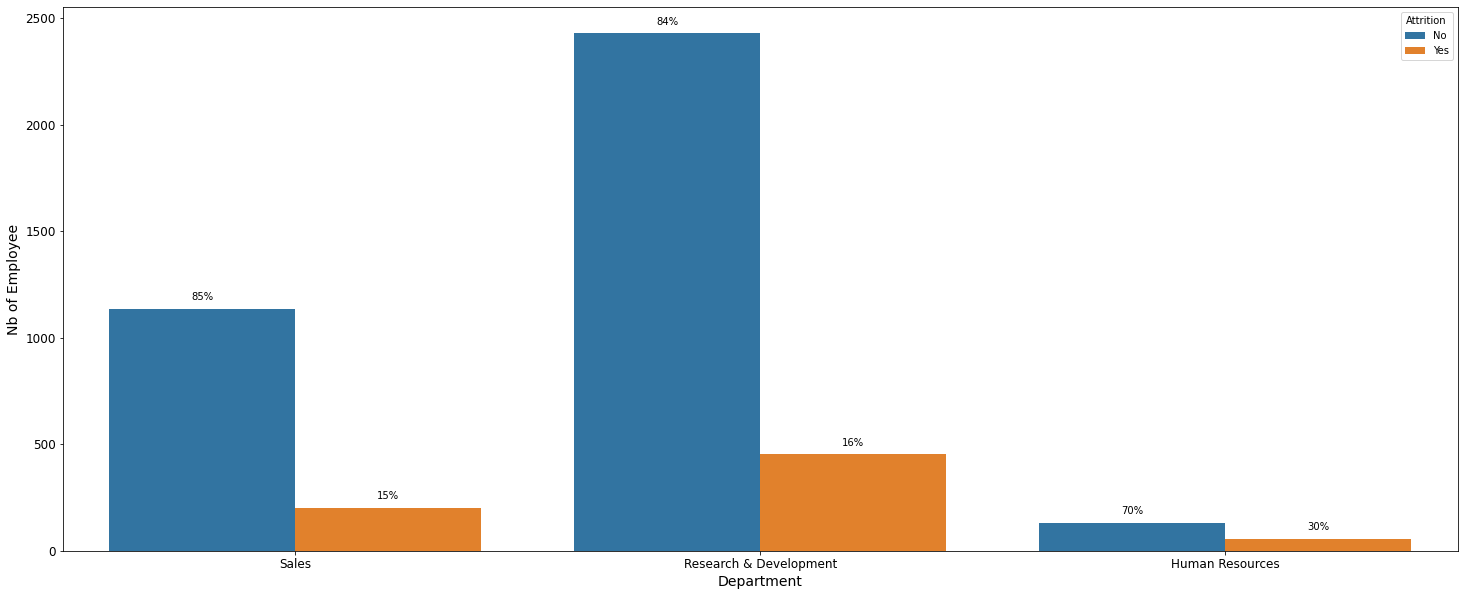

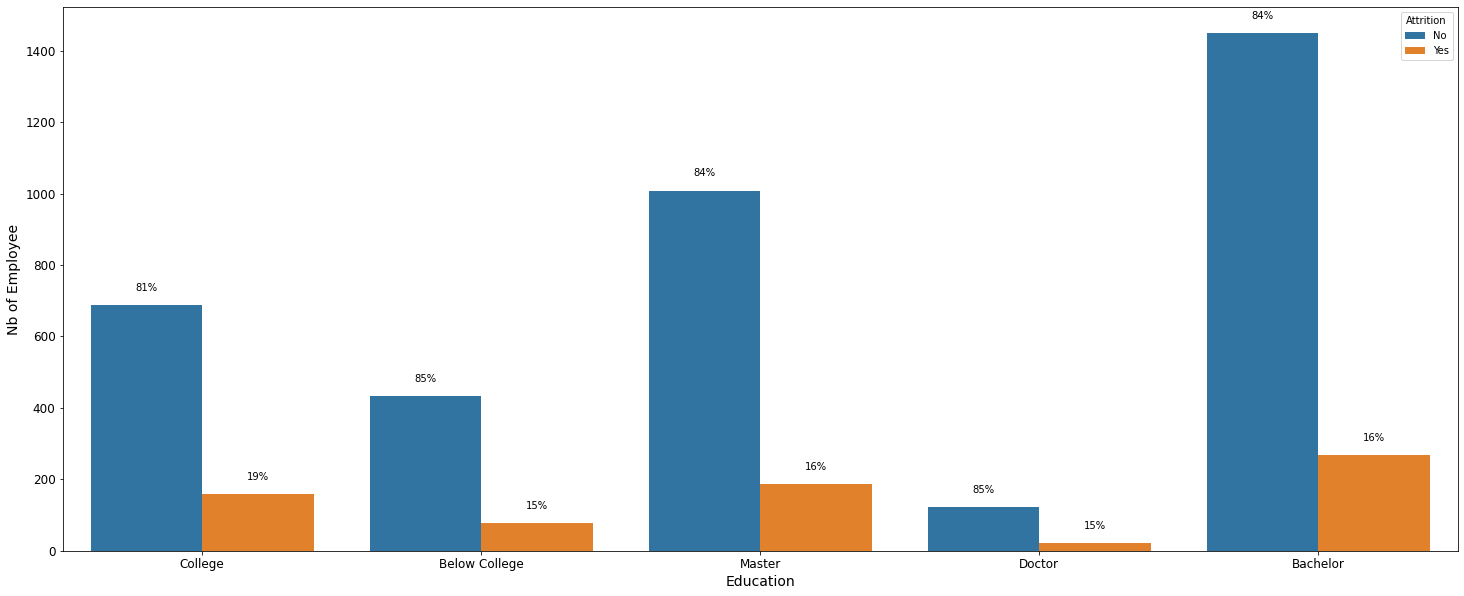

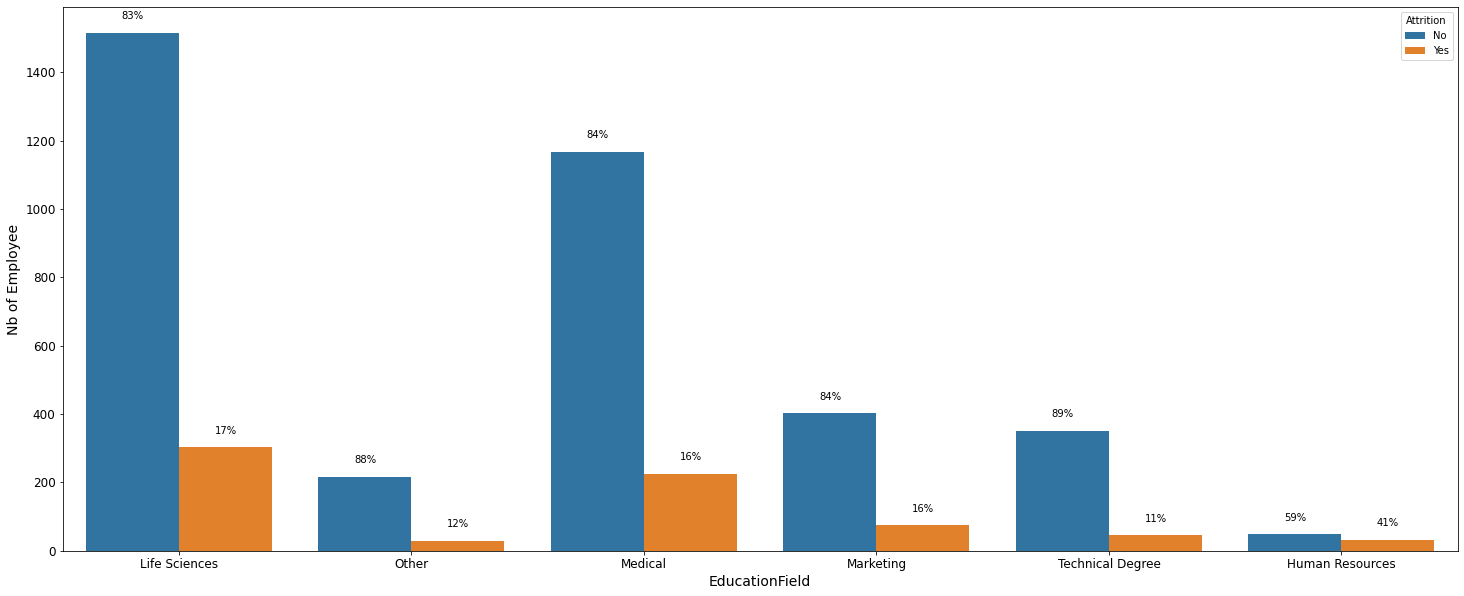

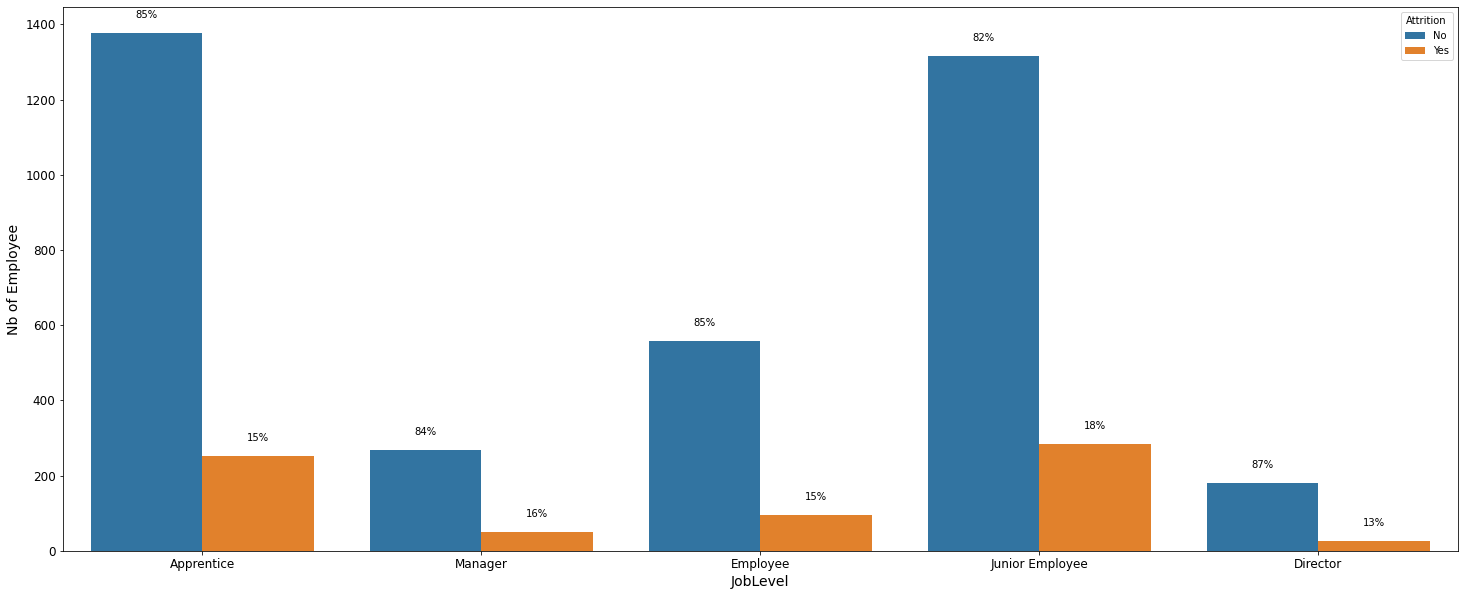

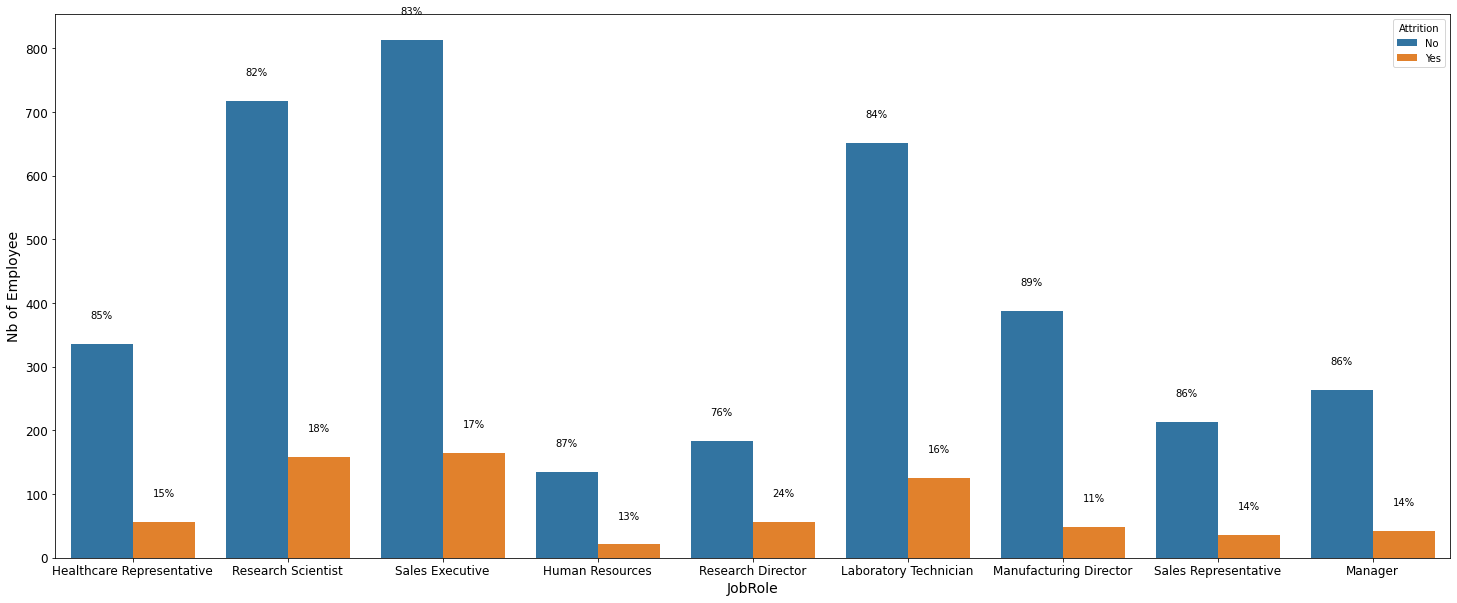

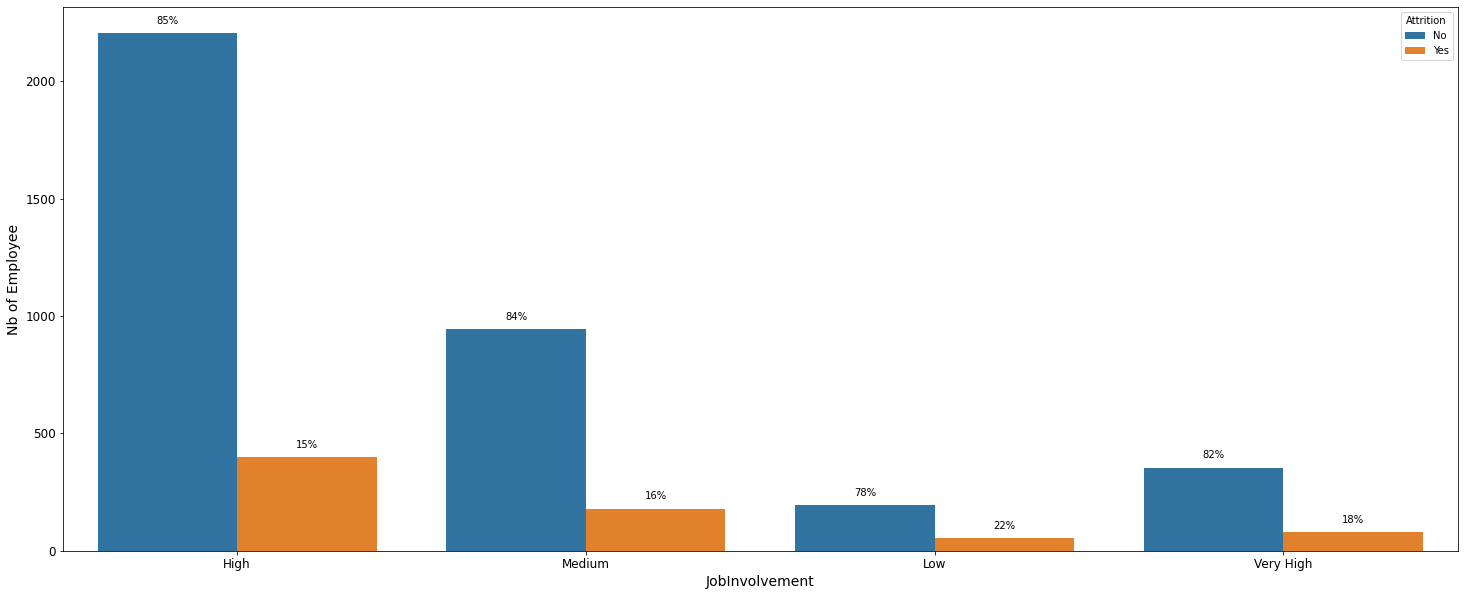

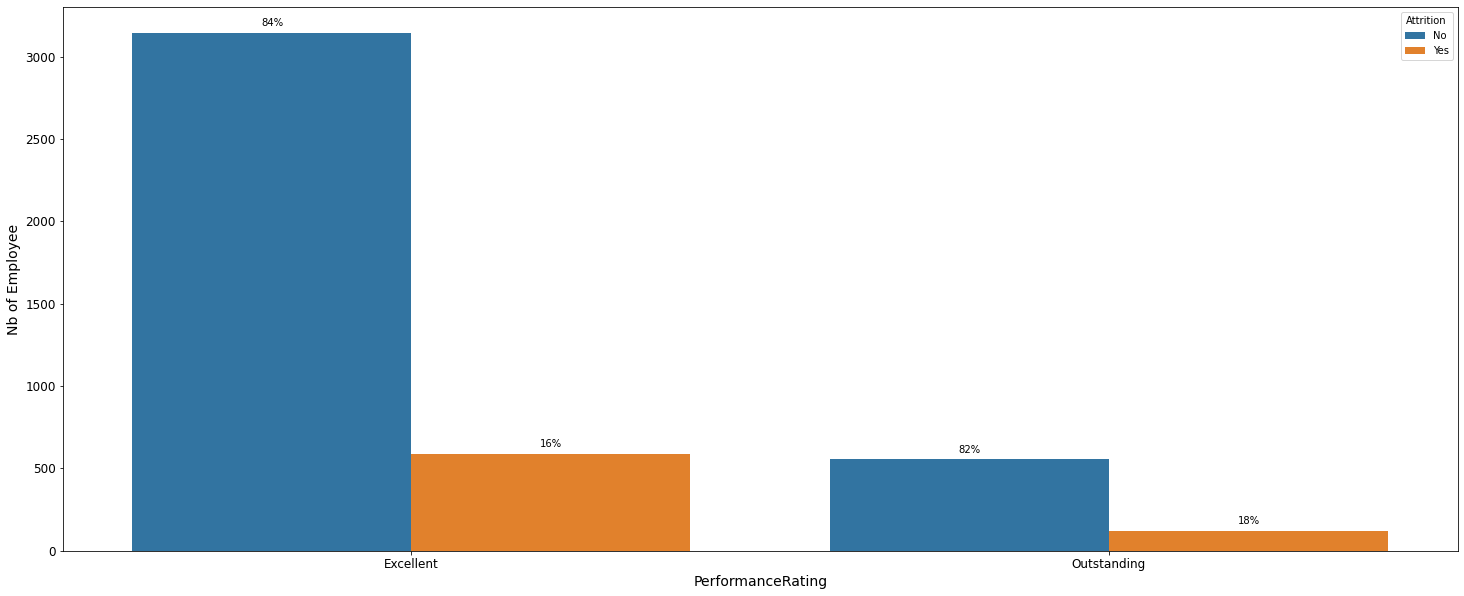

In [11]:
for name_column in allData.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        plt.figure(figsize=(25,10))
        ax = sns.countplot(x=name_column, data=allData, hue="Attrition")
        ax.set_ylabel('Nb of Employee')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

#### Analyse de toutes les variables quantitatives

Vous trouverez en dessous tous les graphes avec les variables de type `number` du jeu de données.

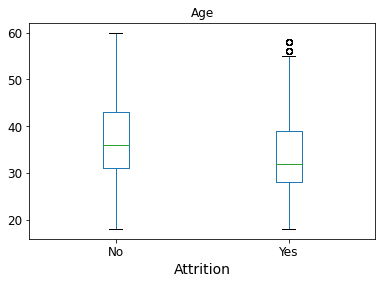

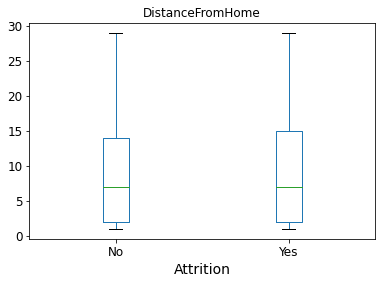

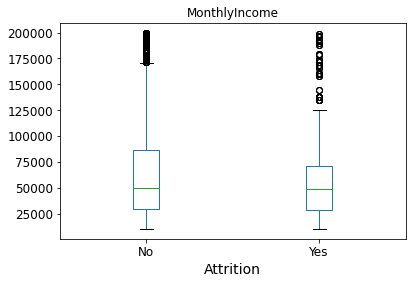

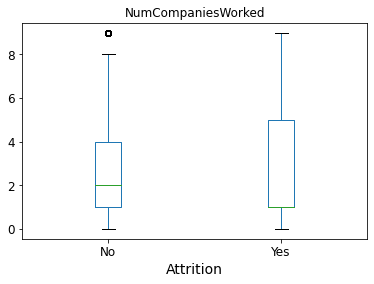

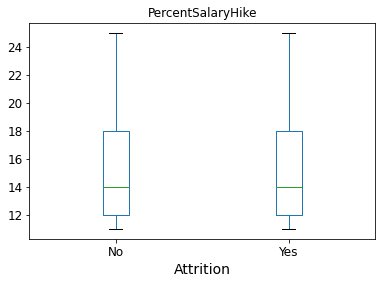

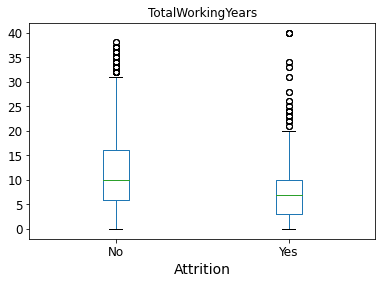

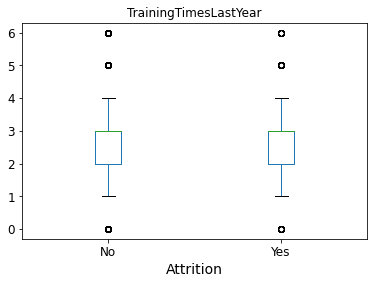

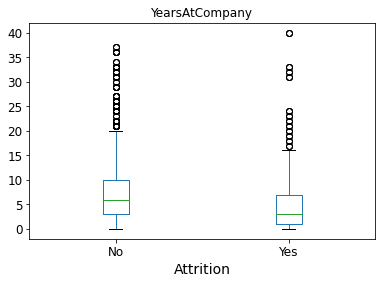

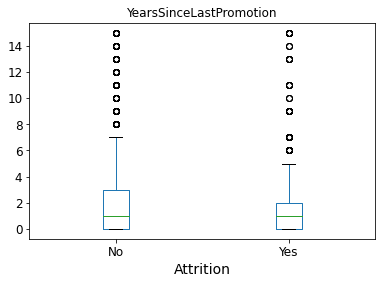

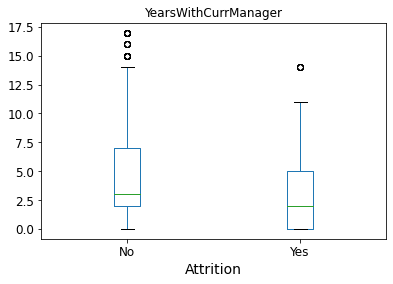

In [12]:
for name_column in allData.select_dtypes(np.number).columns:
    allData.boxplot(by ='Attrition', column = name_column, grid = False, figsize=None) 
    plt.suptitle("")

### B. Test des données

Nous allons utiliser deux tests différents afin de tester la dépendance de la variable attrition avec les autres. On utilise donc Anova lorsque la deuxième variable est quantitative et Khi2 lorsque la deuxième variable est qualitative. Ces tests nous renvoient deux données. La première est la valeur du test et la seconde est la p-value. Cette dernière nous permet d'évaluer la dépendance. Si la p-value est inférieur à 5%, cela veut dire que nous pouvons rejeter l'hypothèse d'indépendance et donc que l'attrition dépend de la variable  choisie.

#### Anova

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for name_column in allData.select_dtypes(include=np.number).columns:
    test_anova = name_column + ' ~ Attrition'
    model = ols(test_anova, data=allData).fit()
    result_anova = sm.stats.anova_lm(model, typ=2)
    print(name_column, "= F : ", result_anova["F"][0], ", p_value : ", result_anova["PR(>F)"][0], "\033[32mDépendant\033[0m" if result_anova["PR(>F)"][0] < 0.05 else "\033[31mIndépendant\033[0m")

Age = F :  114.63168185909088 , p_value :  1.99680161588347e-26 Dépendant
DistanceFromHome = F :  0.4173697538460119 , p_value :  0.5182860428065224 Indépendant
MonthlyIncome = F :  4.288570383801474 , p_value :  0.038427484905952394 Dépendant
NumCompaniesWorked = F :  7.884212755837609 , p_value :  0.0050088441899783275 Dépendant
PercentSalaryHike = F :  4.670236608422217 , p_value :  0.030743386433341374 Dépendant
TotalWorkingYears = F :  131.4519328410399 , p_value :  5.241246810654903e-30 Dépendant
TrainingTimesLastYear = F :  10.796807998328598 , p_value :  0.0010247061915349563 Dépendant
YearsAtCompany = F :  81.07844519572163 , p_value :  3.16388312248436e-19 Dépendant
YearsSinceLastPromotion = F :  4.811020933642641 , p_value :  0.02833033618936241 Dépendant
YearsWithCurrManager = F :  110.23696796790489 , p_value :  1.7339322652883619e-25 Dépendant


#### Khi2

In [14]:
import scipy.stats as stats


for name_column in allData.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(allData['Attrition'], allData[name_column])
        chi2, pvalue,dof, expected = stats.chi2_contingency(matrice)
        print(name_column, "= Statistics : ", chi2, ", p_value : ", pvalue, "\033[32mDépendant\033[0m" if pvalue < 0.05 else "\033[31mIndépendant\033[0m")

EnvironmentSatisfaction = Statistics :  65.20741335391335 , p_value :  4.5288923374665606e-14 Dépendant
JobSatisfaction = Statistics :  51.80338311883507 , p_value :  3.298455638541936e-11 Dépendant
WorkLifeBalance = Statistics :  48.97447919261813 , p_value :  1.3208783070533642e-10 Dépendant
BusinessTravel = Statistics :  72.54724105696552 , p_value :  1.764276972983189e-16 Dépendant
Department = Statistics :  29.090274924488266 , p_value :  4.820888218170406e-07 Dépendant
Education = Statistics :  5.641147679249198 , p_value :  0.2275982630178239 Indépendant
EducationField = Statistics :  46.194921001730584 , p_value :  8.288917469574179e-09 Dépendant
JobLevel = Statistics :  6.2691759264759925 , p_value :  0.1799276801337184 Indépendant
JobRole = Statistics :  25.116313674604072 , p_value :  0.001485544744815264 Dépendant
JobInvolvement = Statistics :  8.139110006255443 , p_value :  0.04322252837372166 Dépendant
PerformanceRating = Statistics :  2.2421603030041135 , p_value :  0.13

On peut donc constater que l'attrition est liée à de nombreuses variables

### C. Echantillonage stratifié



In [15]:
allDataForSplit = allData.copy()

X = allData.drop(['Attrition'], axis=1)
y = allData['Attrition'].copy()



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=allData.Attrition)


## 3. Pipeline ML

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

dataNum = X_train.select_dtypes(include=[np.number])
dataCat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(dataNum)
cat_attribs = list(dataCat)
encoder = OneHotEncoder()

encoder.fit(dataCat)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", encoder, cat_attribs),
    ])

data_X_train_prepared = full_pipeline.fit_transform(X_train)
data_X_train_prepared = pd.DataFrame(
    data_X_train_prepared,
    columns=list(np.concatenate((num_attribs, encoder.get_feature_names(cat_attribs)))))

data_X_test_prepared = full_pipeline.fit_transform(X_test)
data_X_test_prepared = pd.DataFrame(
    data_X_test_prepared,
    columns=list(np.concatenate((num_attribs, encoder.get_feature_names(cat_attribs)))))
data_X_test_prepared


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,PerformanceRating_Excellent,PerformanceRating_Outstanding
0,0.308075,-0.428745,-0.798218,1.354789,-0.616033,1.132973,-0.651395,-0.980798,-0.677836,-1.145716,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.013701,-0.666776,0.749548,-0.670048,-0.346429,-0.173620,0.118753,0.503111,1.456621,1.110332,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.916954,1.594523,-0.573656,0.139887,-0.616033,1.524951,-1.421544,-0.651041,-0.372913,-0.581704,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.335477,1.713539,-0.777901,-1.075016,-1.155240,0.218358,-0.651395,0.832869,-0.067991,1.956349,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.916954,0.166334,-0.788380,-0.670048,0.731985,3.223522,2.429199,4.789960,-0.067991,2.520361,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0.951626,-0.666776,-0.741757,0.949822,-0.616033,2.178248,0.118753,-0.815920,-0.372913,-0.581704,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1319,-0.228218,-0.547760,-0.260125,-0.265081,0.731985,0.610336,0.888902,-0.980798,-0.677836,-1.145716,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1320,-1.193546,-0.904808,-0.082614,-1.075016,-0.885636,-0.434938,0.118753,0.008474,-0.372913,-1.145716,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1321,-0.335477,-0.904808,-0.221629,-0.670048,-0.346429,-0.173620,1.659050,0.503111,0.541854,1.110332,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## 4. Modèle et performance

### A. Régression logistique

In [44]:
from sklearn.linear_model import LogisticRegression
X_train_lr = data_X_train_prepared.copy()
y_train_lr = (y_train.copy() == "Yes")
X_test_lr = data_X_test_prepared.copy()
y_test_lr = (y_test.copy() == "Yes")
lr = LogisticRegression(max_iter=500)
lr.fit(X=X_train_lr, y=y_train_lr)



LogisticRegression(max_iter=500)

In [45]:
import numpy
lr_pred = lr.predict(X_test_lr)

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train_lr, y_train_lr, cv=3, scoring="accuracy")

array([0.83576288, 0.83479106, 0.8425656 ])

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_lr, lr_pred)

array([[1091,   19],
       [ 176,   37]], dtype=int64)

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test_lr, lr_pred))

              precision    recall  f1-score   support

       False       0.86      0.98      0.92      1110
        True       0.66      0.17      0.28       213

    accuracy                           0.85      1323
   macro avg       0.76      0.58      0.60      1323
weighted avg       0.83      0.85      0.81      1323



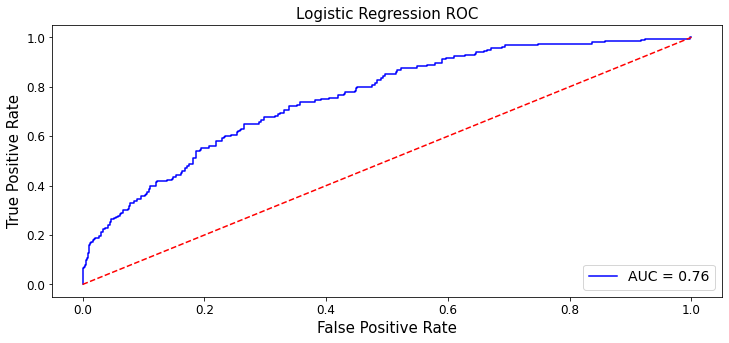

In [22]:

plt.figure(figsize=(12,5))

probaLr = lr.predict_proba(X_test_lr)
lr_pred = probaLr[:,1]
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test_lr, lr_pred, pos_label=lr.classes_[1])
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Logistic Regression ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

### B. Forêt aléatoire

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
X_train_forest = data_X_train_prepared.copy()
y_train_forest = (y_train.copy() == "Yes")
X_test_forest = data_X_test_prepared.copy()
y_test_forest = (y_test.copy() == "Yes")
forest_clf = RandomForestClassifier(random_state=42, n_estimators=200)
forest_clf.fit(X_train_forest,y_train_forest)

forest_pred=forest_clf.predict(X_test_forest)


In [42]:
confusion_matrix(y_test_forest, forest_pred)

array([[1104,    6],
       [   8,  205]], dtype=int64)

In [24]:
print(metrics.classification_report(y_test_forest, forest_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1110
        True       0.97      0.96      0.97       213

    accuracy                           0.99      1323
   macro avg       0.98      0.98      0.98      1323
weighted avg       0.99      0.99      0.99      1323



In [25]:
cross_val_score(forest_clf, X_train_forest, y_train_forest, cv=3, scoring="accuracy")

array([0.95140914, 0.95043732, 0.94460641])

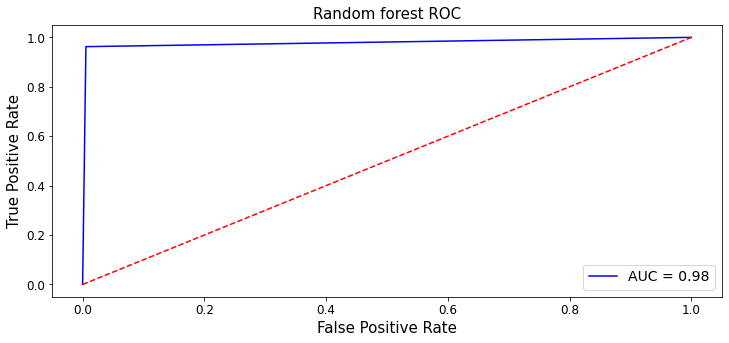

In [26]:
plt.figure(figsize=(12,5))

fpr_rdm_forest, tpr_rdm_forest, threshold_rdm_forest = metrics.roc_curve(y_test_forest, forest_pred)
roc_auc_rdm_forest = metrics.auc(fpr_rdm_forest, tpr_rdm_forest)

plt.plot(fpr_rdm_forest, tpr_rdm_forest, 'b', label = 'AUC = %0.2f' % roc_auc_rdm_forest)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Random forest ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

### C. Arbre de décision

<p>Implémentation de l'algorithme d'arbre de décision

In [27]:
from sklearn.tree import DecisionTreeClassifier
X_train_tree = data_X_train_prepared.copy()
y_train_tree = (y_train.copy() == "Yes")
X_test_tree = data_X_test_prepared.copy()
y_test_tree = (y_test.copy() == "Yes")
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree = tree.fit(X_train_tree, y_train_tree)
tree.score(X_train_tree, y_train_tree)

0.9096209912536443

<p>Visualisation du graphique avec la librairie GraphViz

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="arbre.dot", filled=True, feature_names= X_train_tree.columns)

In [29]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [30]:
!dot -Tpng arbre.dot -o arbre.png

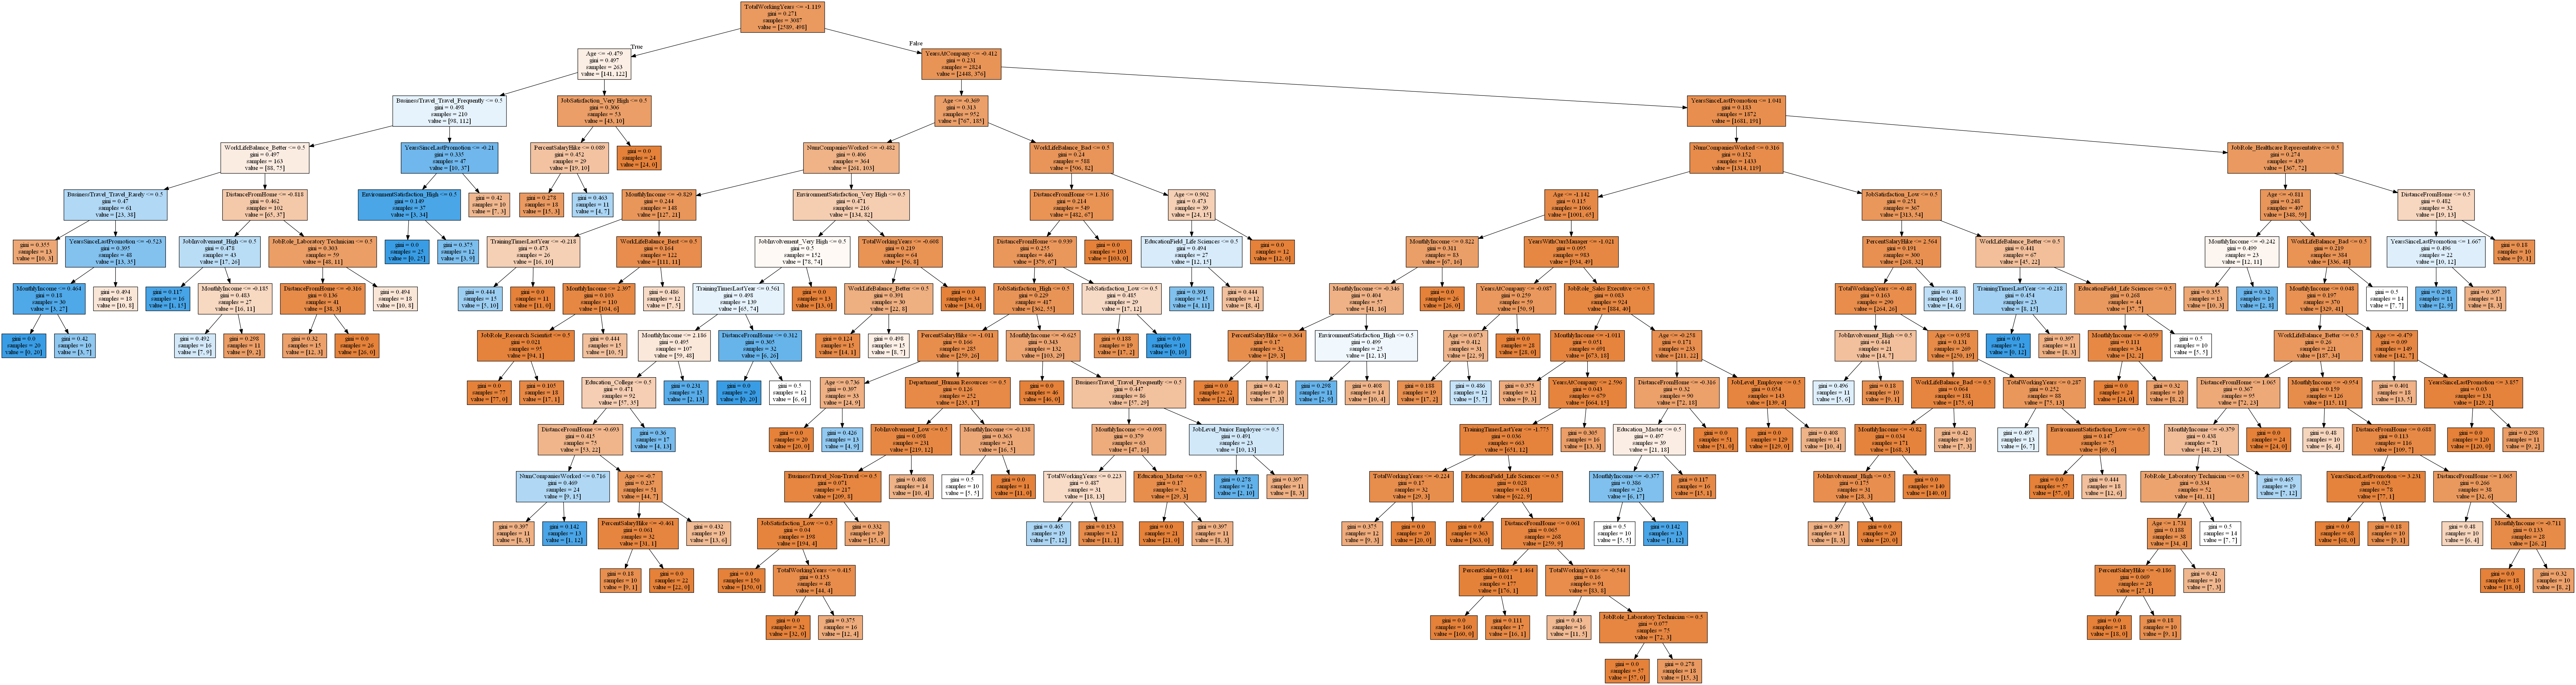

In [31]:
from IPython.core.display import Image
Image("arbre.png")

<p>Cross validation

In [32]:
tree_pred = tree.predict(X_test_lr)

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X_train_tree, y_train_tree, cv=3, scoring="accuracy")

array([0.83187561, 0.82118562, 0.82798834])

<p>Matrice de confusion

In [34]:
confusion_matrix(y_test_tree, tree_pred)

array([[1049,   61],
       [ 129,   84]], dtype=int64)

<p>Rapport de la classification

In [35]:
print(metrics.classification_report(y_test_tree, tree_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      1110
        True       0.58      0.39      0.47       213

    accuracy                           0.86      1323
   macro avg       0.73      0.67      0.69      1323
weighted avg       0.84      0.86      0.84      1323



<p>Création de la courbre ROC

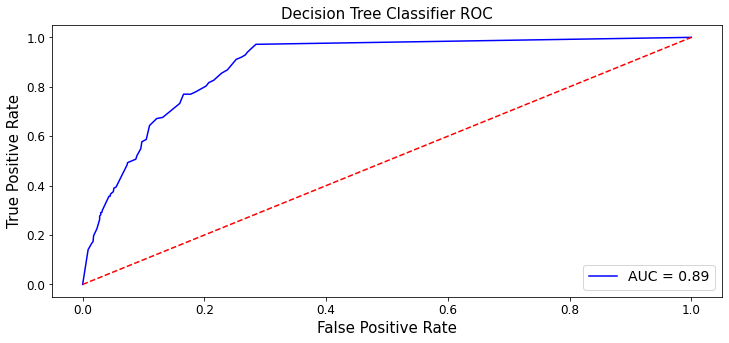

In [36]:
plt.figure(figsize=(12,5))

probaTree = tree.predict_proba(X_test_tree)
tree_test_pred = probaTree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test_tree, tree_test_pred, pos_label=tree.classes_[1])
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC = %0.2f' % roc_auc_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Decision Tree Classifier ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

### D. SVC (Support Vector Classifier) 

<p>Implémentation de l'algorithme Support Vector Classifier

In [37]:
from sklearn import svm

sv = svm.SVC(kernel='rbf', probability=True) #Create a svm Classifier
X_train_svc = data_X_train_prepared.copy()
y_train_svc = y_train.copy()
X_test_svc = data_X_test_prepared.copy()
y_test_svc = y_test.copy()
sv.fit(data_X_train_prepared, y_train)

svc_pred = sv.predict(X_test_svc)

In [48]:
cross_val_score(sv, X_train_svc, y_train_svc, cv=3, scoring="accuracy")

array([0.86880466, 0.86977648, 0.87172012])

<p>Matrice de confusion

In [38]:
confusion_matrix(y_test_svc, svc_pred)

array([[1105,    5],
       [ 141,   72]], dtype=int64)

<p>Rapport de la classification

In [39]:
print(metrics.classification_report(y_test_svc, svc_pred))


              precision    recall  f1-score   support

          No       0.89      1.00      0.94      1110
         Yes       0.94      0.34      0.50       213

    accuracy                           0.89      1323
   macro avg       0.91      0.67      0.72      1323
weighted avg       0.89      0.89      0.87      1323



<p>Création de la courbre ROC

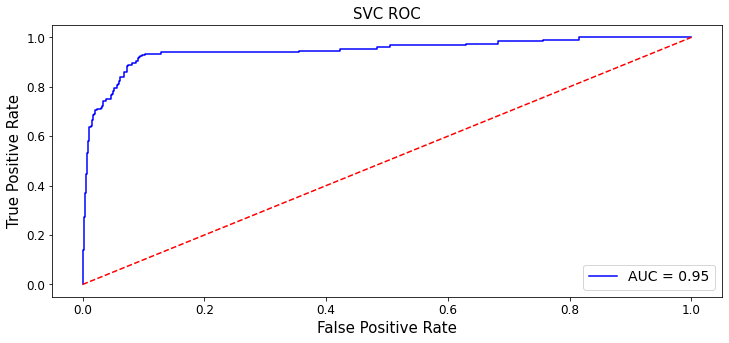

In [40]:
plt.figure(figsize=(12,5))

probaSVC = sv.predict_proba(X_test_svc)
svc_pred = probaSVC[:,1]
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test_svc, svc_pred, pos_label=sv.classes_[1])
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)

plt.plot(fpr_svc, tpr_svc, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('SVC ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

### E. Classements de tous les algorithmes

| Algorithmes | Valeur AUC          |
| ------- | ------------------ |
|   1. Random Forest   | 0.98 |
|   2. SVC   | 0.95 |
|   3. Arbre de décision  | 0.89 |
|  4. Régression Logistique  | 0.76 |

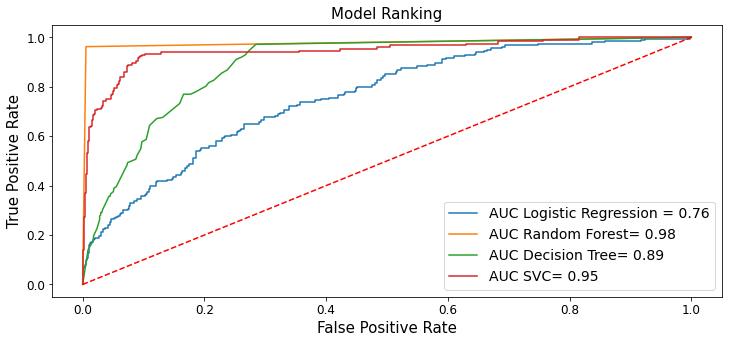

In [41]:
plt.figure(figsize=(12,5))
plt.plot(fpr_lr, tpr_lr, label = 'AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_rdm_forest, tpr_rdm_forest, label = 'AUC Random Forest= %0.2f' % roc_auc_rdm_forest)
plt.plot(fpr_tree, tpr_tree, label = 'AUC Decision Tree= %0.2f' % roc_auc_tree)
plt.plot(fpr_svc, tpr_svc, label = 'AUC SVC= %0.2f' % roc_auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Model Ranking', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

## Résultats